In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import corner
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
#
import sys
sys.path.append('../../')
import data.datasets as datasets
import data.data_utils as dutils

/Users/philipharris/Dropbox/Physics/8S50_2022/test3/phlab-neurips25/experiments/toyjet/../../data/datasets.py:388: RuntimeWarning: invalid value encountered in sqrt
  vals=ints1[1:-1]*iNSig/np.sqrt(ints2[1:-1]*iNBkg+0.1)


Means: [0, 1.0, 0.42453198262163805, 0.40908509502067825] 
Sigmas: [0.2, 0.2, 0.3083064064183492, 0.07373157372843986]
choice [array([0, 2, 3, 1]), array([1, 2, 0, 3]), array([3, 1, 2, 0]), array([2, 3, 1, 0])]


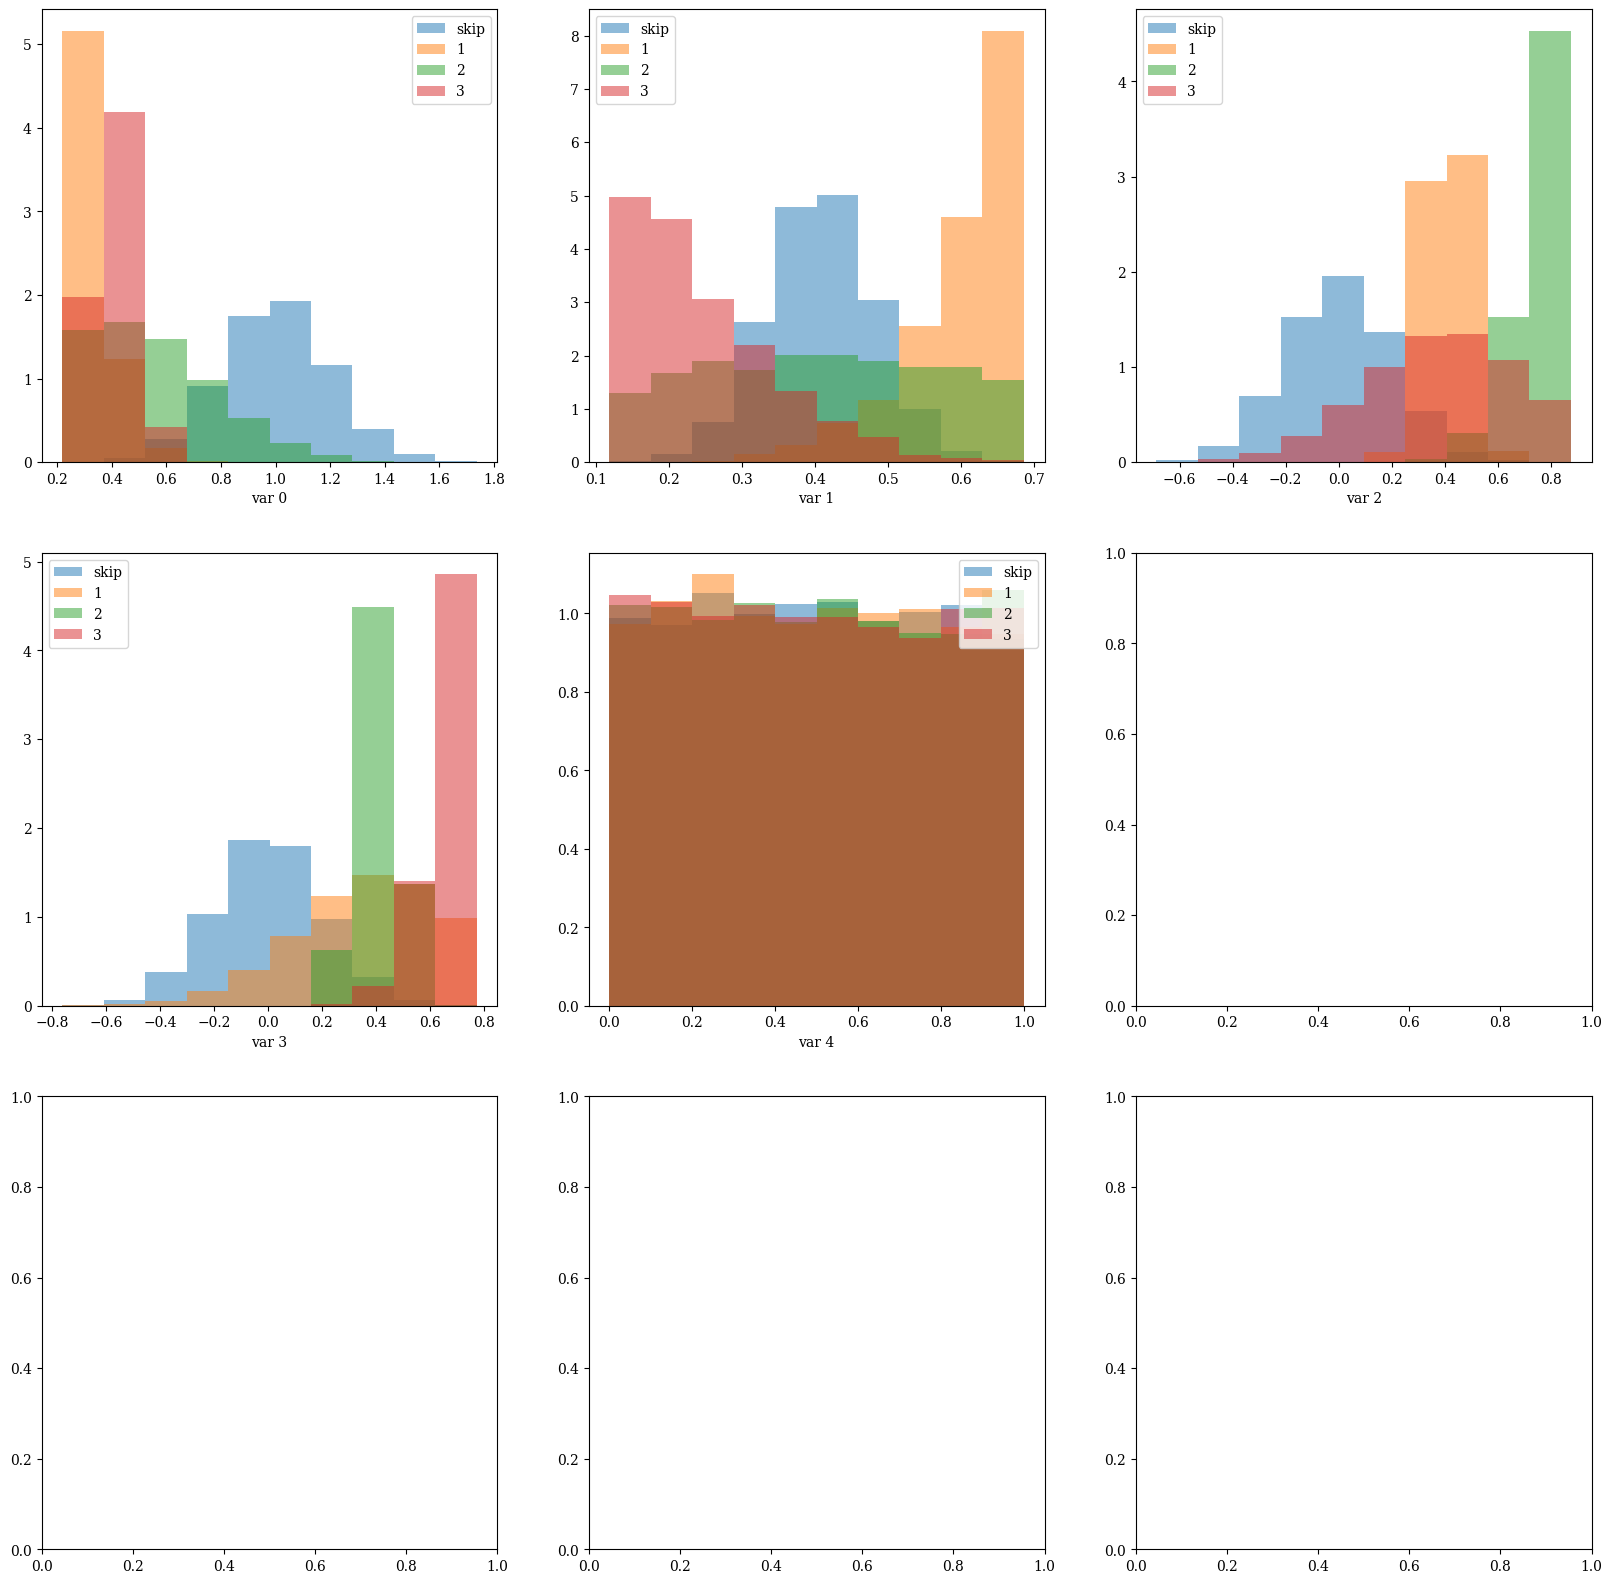

In [20]:
#np.random.seed(1000)
embed_dim=4
nsigs=4
ndisc=4
nrand=1
nj_train   = 10000
nj_valid   = 10000
nj_testy   = 10000
tjds       = datasets.FlatDataset(nsigs,ndisc,nj_train,nj_valid,nj_testy,nrand)
tjds.plot()

In [ ]:
model,o1,o2=tjds.trainQuick(embed_dim=embed_dim,num_epochs=10,temp=0.01)

/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.
/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'projector' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['projector'])`.
/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'classifier' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['classifier'])`.
/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'shifter' is an insta

Sanity Checking: |                                                                                            …

/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:476: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/Users/philipharris/miniconda3/lib/python3.10/site-packages/lightning/pytorch/loops/fit_loop.py:310: The number of training batches (30) is smaller than the logging interval Trainer(log_eve

Training: |                                                                                                   …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

Validation: |                                                                                                 …

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_45613/1951311895.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  c1=torch.nn.functional.softmax(model.classifier(o1)[tjds.train_labels != (nsigs-1)]).numpy()
/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_45613/1951311895.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  c2=torch.nn.functional.softmax(model.classifier(o2)[tjds.true_labels  != (nsigs-1)]).numpy()


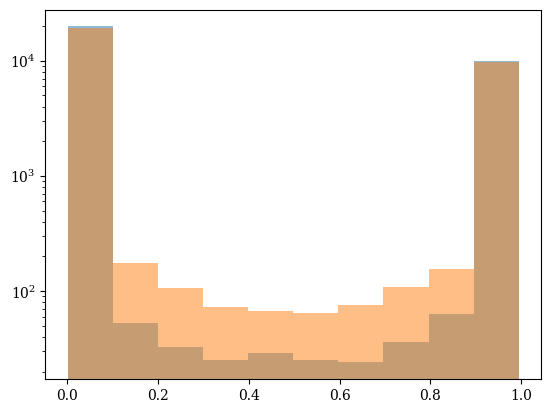

29162 40000


In [37]:
from models.networks import MLP
with torch.no_grad(): 
    c1=torch.nn.functional.softmax(model.classifier(o1)[tjds.train_labels != (nsigs-1)]).numpy()
    c2=torch.nn.functional.softmax(model.classifier(o2)[tjds.true_labels  != (nsigs-1)]).numpy()

plt.hist(c1[:,1],alpha=0.5)
plt.hist(c2[:,1],alpha=0.5)
plt.yscale('log')
plt.show()

embed_dim=4
cut_threshold = 0.9 # threshold to cut on for training subsample; assigned class prob must be > threshold
maxval1=np.max(c1,1)
maxval2=np.max(c2,1)
#cut_mctr = tjds.train_data[tjds.train_labels != (nsigs-1)][maxval1 > cut_threshold]
cut_data   = tjds.true_data  [tjds.true_labels != (nsigs-1)][maxval2 > cut_threshold]
cut_labeld = tjds.true_labels[tjds.true_labels != (nsigs-1)][maxval2 > cut_threshold]
cut_ds     = dutils.GenericDataset(cut_data, cut_labeld)
print(len(cut_ds),len(tjds.train_dataset))

merger=dutils.ConcatWithLabels([tjds.train_dataset_basic,cut_ds],[0,1])
train_loader   = DataLoader(merger,batch_size=1000,shuffle=True,num_workers=1,drop_last=True)
#domain_shifter = MLP(embed_dim,[32,32,32],embed_dim,activation='relu')

In [41]:
#from models.losses import SupervisedSimCLRLoss
#criterion = SupervisedSimCLRLoss(temperature=0.1)
#optimizer = torch.optim.AdamW(model.parameters(),lr=1e-3)#+domain_shifter.parameters,lr=5e-4)
dutils.train_generic_datamc(1,train_loader,model,criterion,optimizer,iCorrectData=True)

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor [1000, 4]], which is output 0 of IndexPutBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

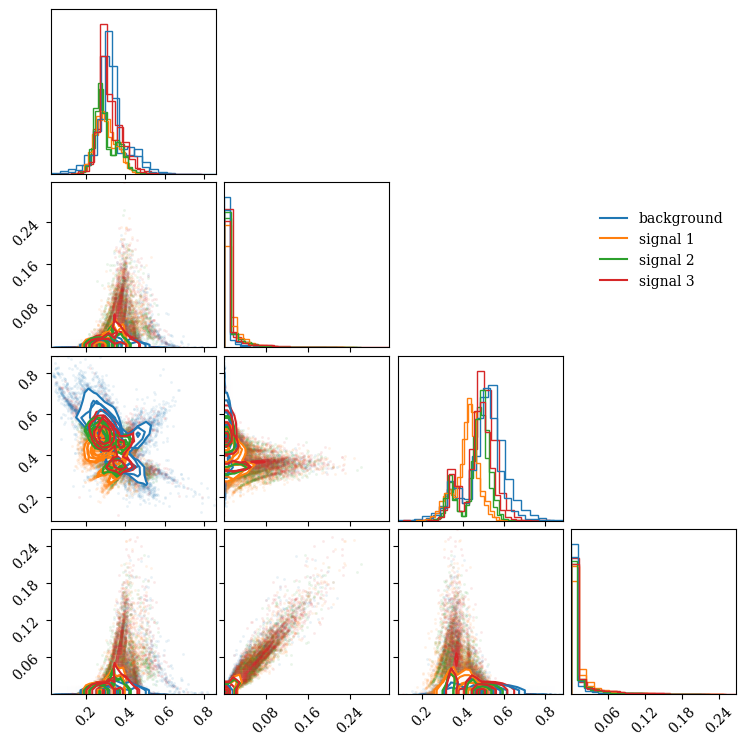

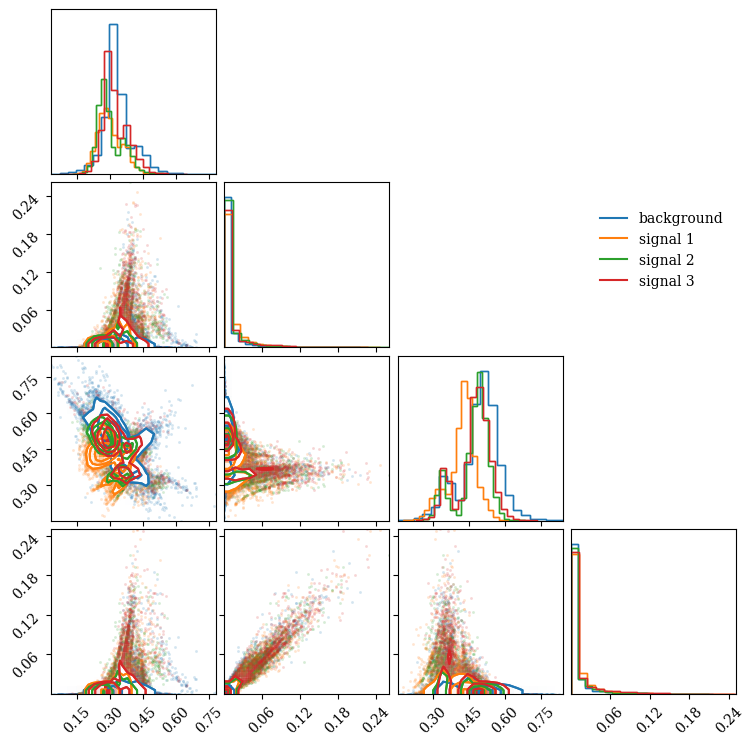

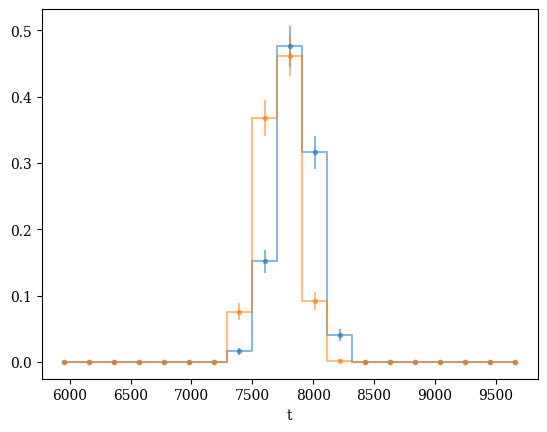

z1 1.0321110792431982 + 1.100912788667012 - 0.9632589018447925
z2 0.005363558543305118 + 0.0718511117223588 - -0.06117144879347349
zemp 0.8203791459684608 + 0.8934801899754196 - 0.7514200102116156 0.206 0.020199961919232956


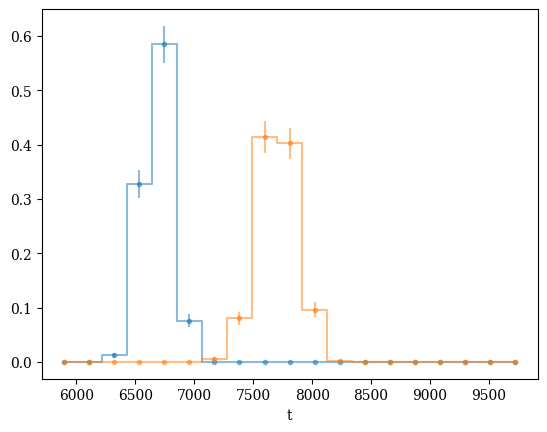

z1 -inf + -inf - -inf
z2 0.005371174151340972 + 0.07568552963030598 - -0.06499633289712335
zemp -inf + -1.6988183750554926 - nan 1.0 0.044676705160877024


(-inf, -inf)

In [35]:
with torch.no_grad():
    output_train  = tjds.model.encoder(tjds.train_data.float())
    output        = tjds.model.encoder(tjds.test_data.float())
    output1       = tjds.model.encoder(tjds.true_data.float())
    #output2       = tjds.model.shifter(output1) ### If we correct data relative to MC
    
#print(output1[0],output2[0])
tjds.cornerQuick(output,output1,tjds.test_labels,tjds.test_labels)
tjds.cornerQuick(output1,output1,tjds.true_labels,tjds.true_labels)
#tjds.cornerQuick(output1,output2,tjds.true_labels,tjds.true_labels)
#tjds.cornerQuick(output,output,tjds.test_labels,tjds.test_labels)
#tjds.zscoreplot(output,output1,tjds.test_labels,tjds.test_labels,tjds.test_data,tjds.true_data)
#dutils.z_yield(output1,tjds.true_labels,output,tjds.test_labels,(nsigs-1),iNbins=1,ntoys=100,iNb=10000,iNr=20000,plot=True)
dutils.run_toy(200, 10000, 20000,output,tjds.test_labels,output,tjds.test_labels,(nsigs-1),ntoys=500,plot=True)
dutils.run_toy(200, 10000, 20000,output1,tjds.true_labels,output,tjds.test_labels,(nsigs-1),ntoys=500,plot=True)



